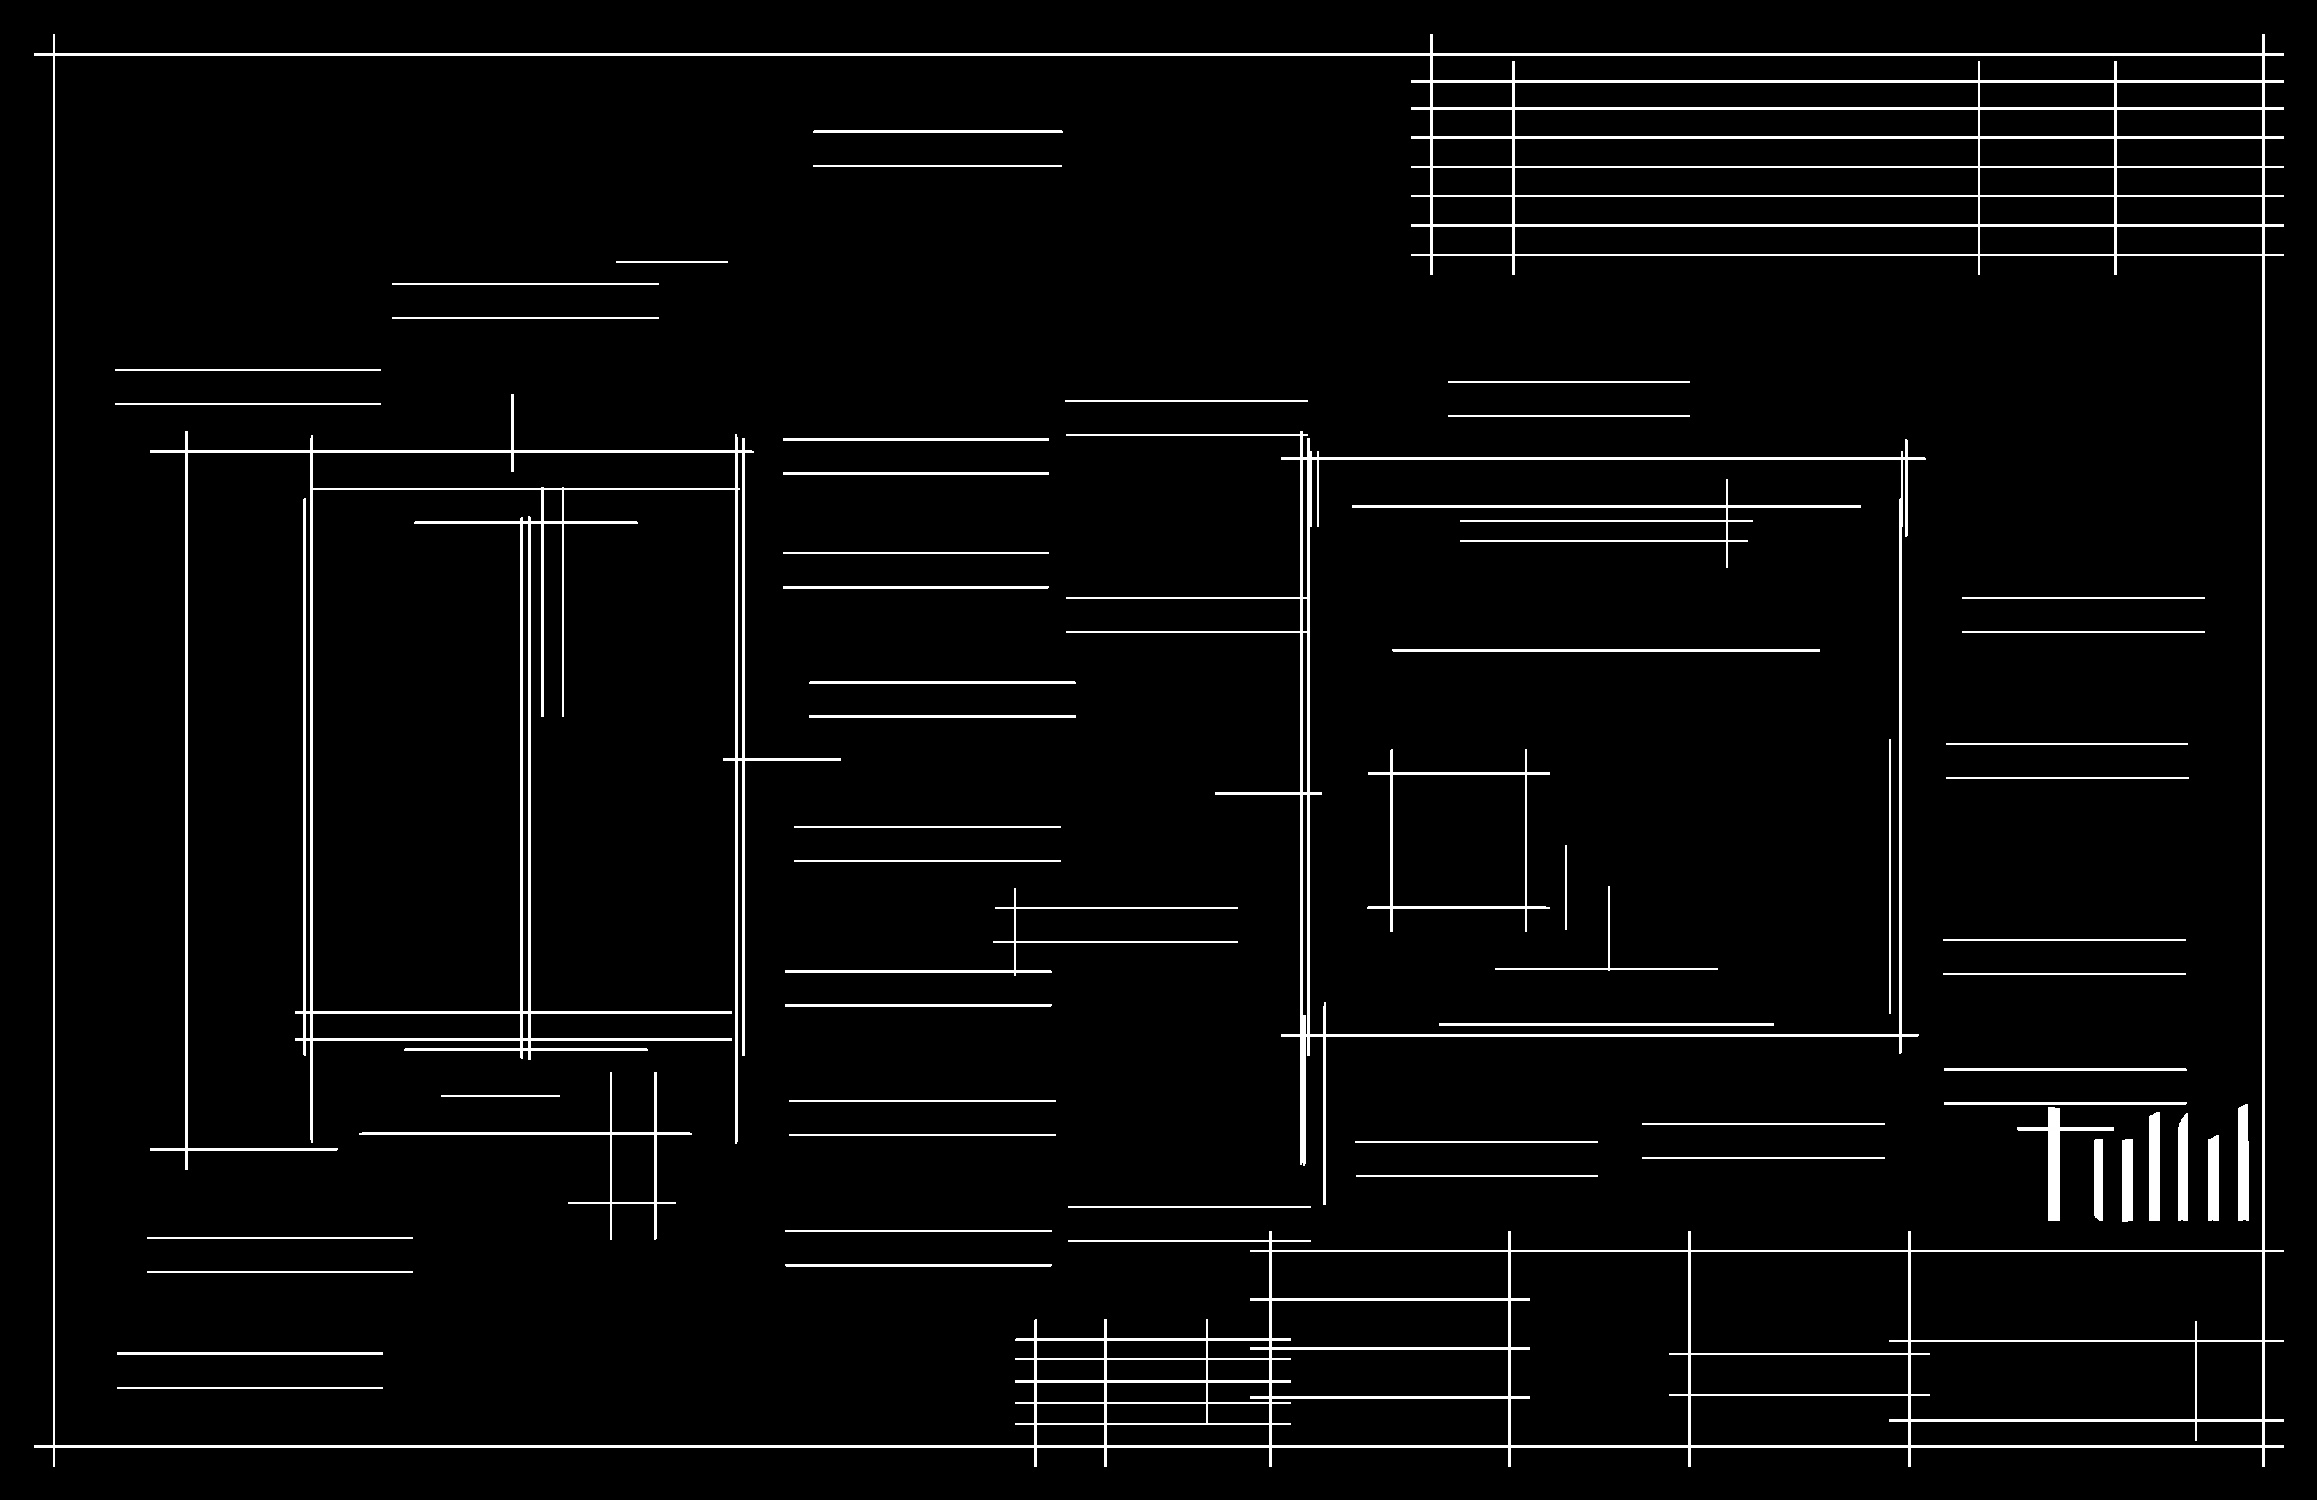

In [1]:
from glob import glob
import os

import cv2
import numpy as np
from PIL import Image
from pdf2image import convert_from_path
from imutils import resize
from tqdm import tqdm
from scoring import *

# f = "../../data/original/Ugly/10.pdf"
# f = "../../data/original/Ugly/2.pdf"
# f = "../../data/original/Ugly/000.895.652.pdf"
# f = "../../data/original/Good/300-014823.pdf"
# f = "../../data/original/Good/300-014822.pdf"

f = "../../data/output-2.jpg"

font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1
color = (255, 0, 0)
thickness = 2

# pages = convert_from_path(f, dpi=300)
# img = np.array(pages[0])
img = cv2.imread(f)
img = im_resize(img)
img_comp = img.copy()

Image.fromarray(img_comp)

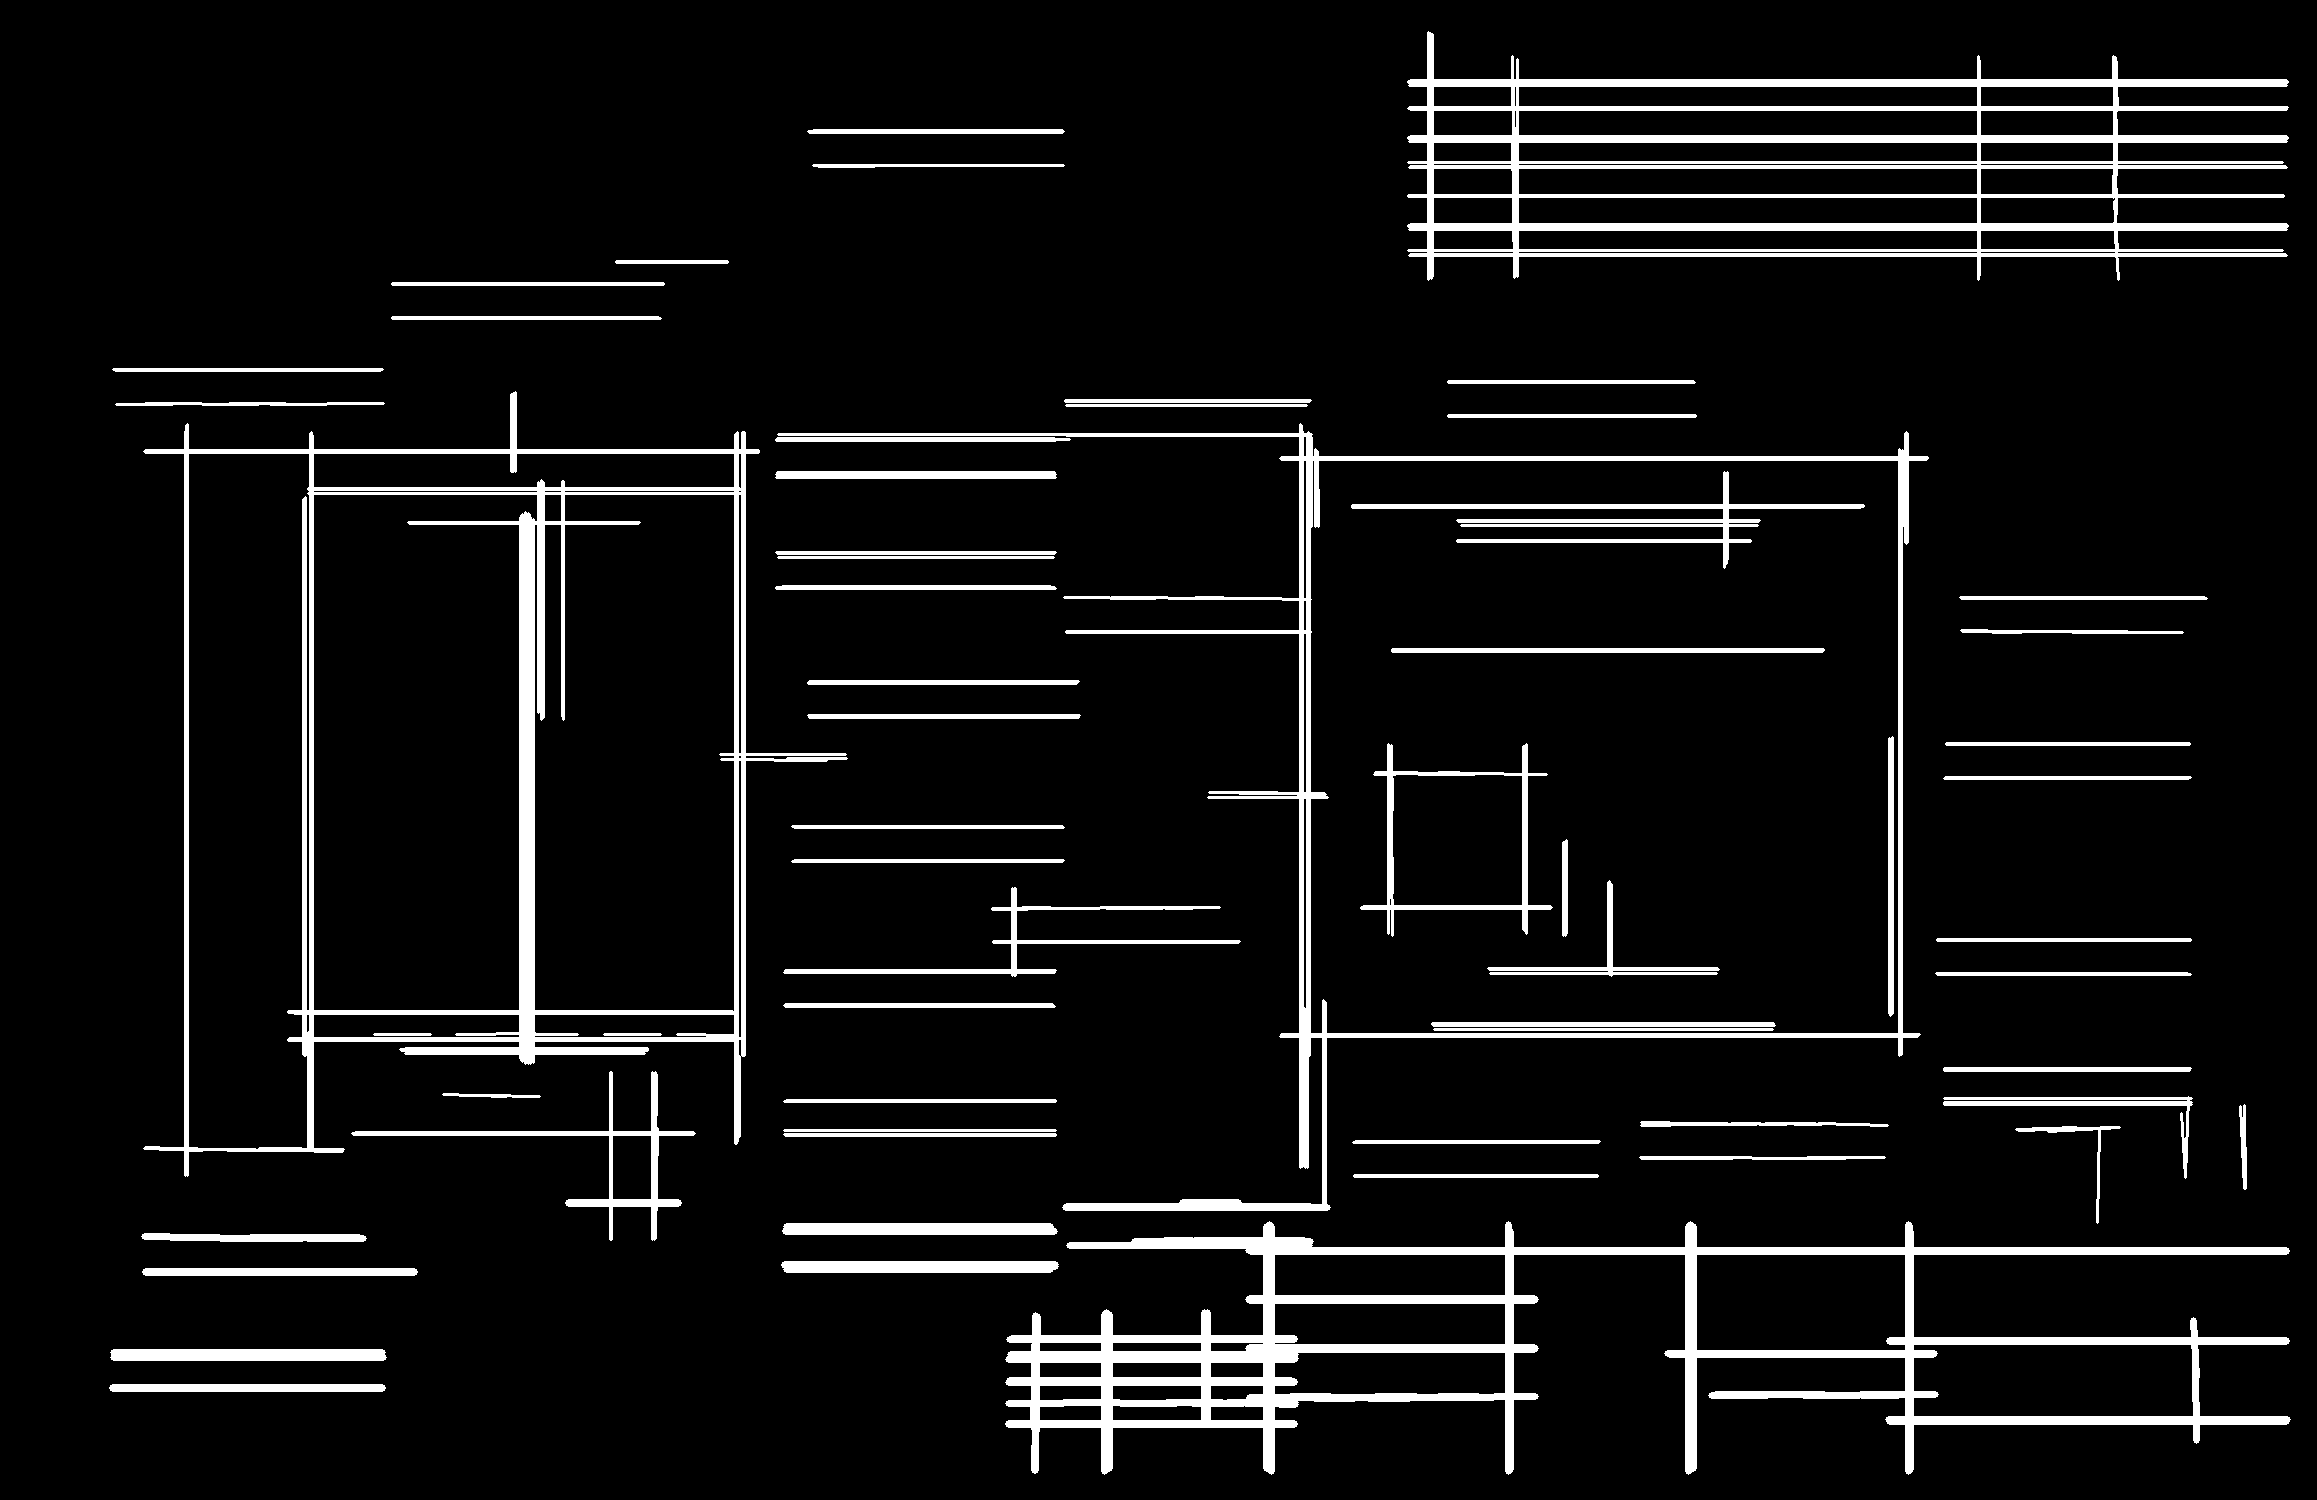

In [2]:
img_comp = img.copy()

image_height, image_width, _ = img.shape
gray = cv2.cvtColor(img_comp, cv2.COLOR_BGR2GRAY)
no_borders = np.zeros_like(img_comp)

lines = cv2.HoughLinesP(gray, 1, np.pi / 180, 15, np.array([]), 50, 10)

for line in lines:
    for x1,y1,x2,y2 in line:
        # cv2.line(img_comp, (x1,y1), (x2,y2), (0, 0, 0) , 3)
        if abs(x2 - x1) > int((image_width * 80) / 100):
            continue
        if abs(y2 - y1) > int((image_height * 80) / 100):
            continue

        if y1 > int((image_height * 80) / 100) and y2 > int((image_height * 80) / 100):
            cv2.line(no_borders, (x1,y1), (x2,y2), (255, 255, 255) , 5)
        else:
            cv2.line(no_borders, (x1,y1), (x2,y2), (255, 255, 255) , 2)

Image.fromarray(no_borders)

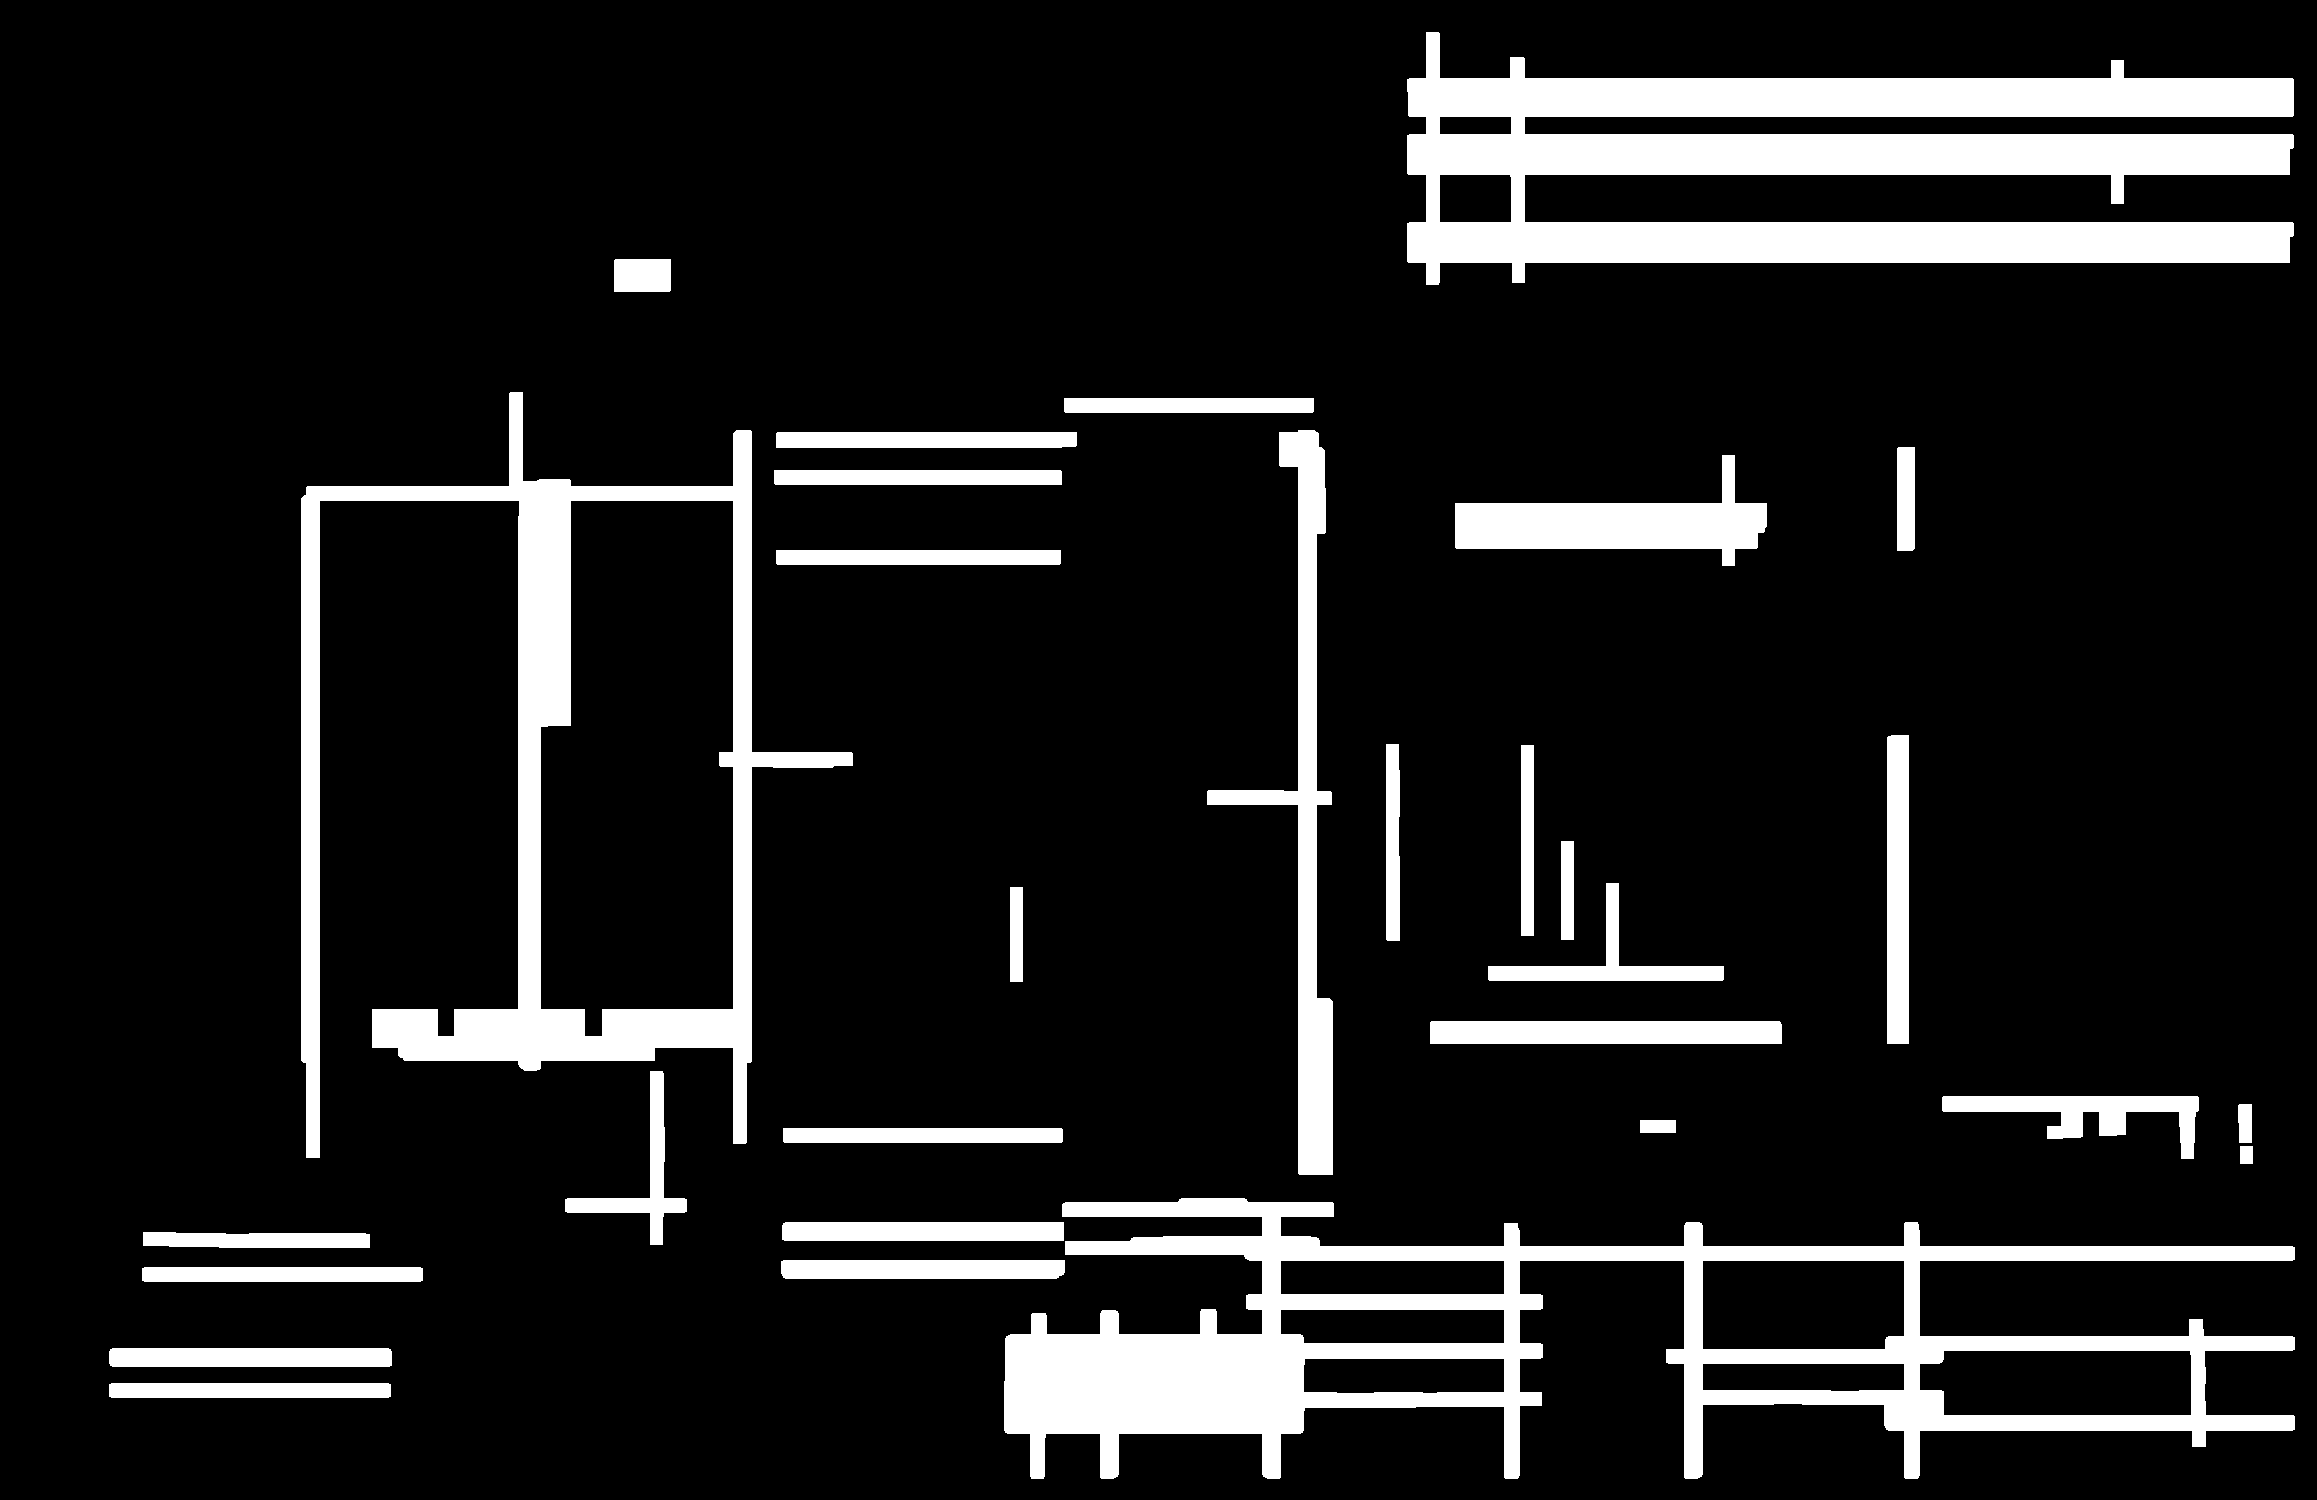

In [3]:
mask_comp = cv2.dilate(no_borders, np.ones((5, 5), np.uint8), iterations=5)
mask_comp = cv2.erode(mask_comp, np.ones((6, 6), np.uint8), iterations=5)
mask_comp = cv2.dilate(mask_comp, np.ones((5, 5), np.uint8), iterations=3)

Image.fromarray(mask_comp)

30


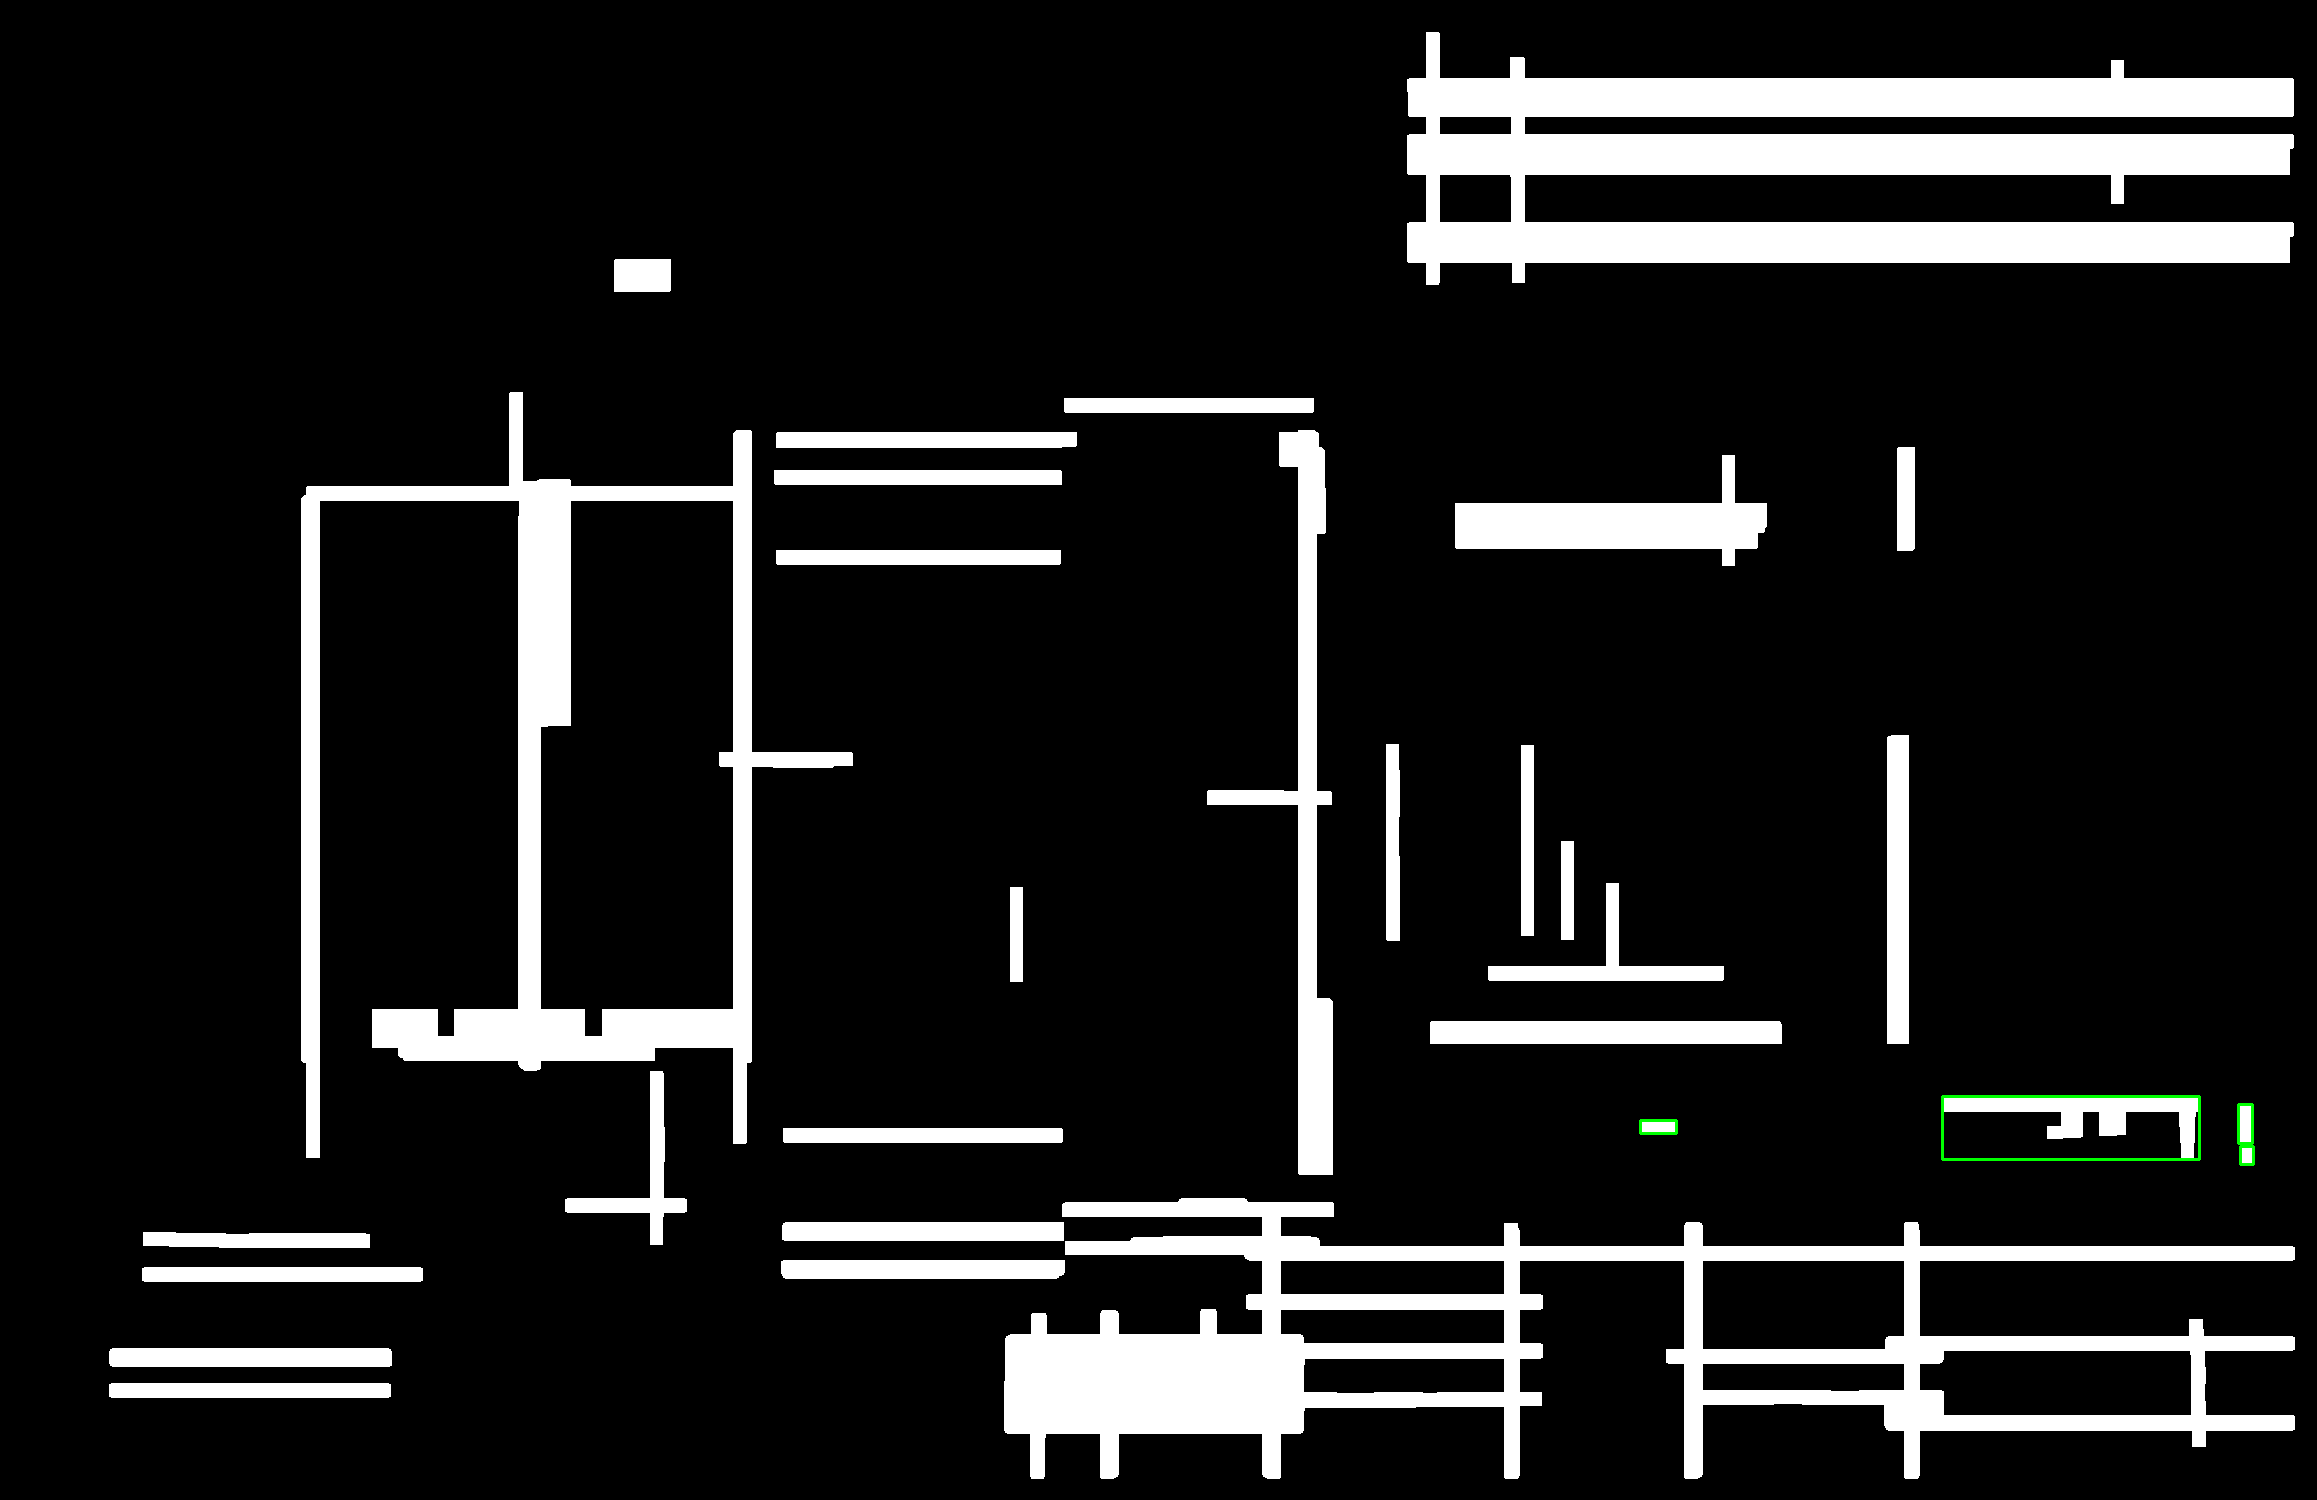

In [6]:
img_comp = img.copy()

gray = cv2.cvtColor(mask_comp, cv2.COLOR_BGR2GRAY)

_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
img_contours = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

height, width = gray.shape

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)

    if x > width * 2/3 and y > height * 2/3:
        aspect_ratio = w / float(h)
        area = cv2.contourArea(cnt)

        # if area > 500 and 0.5 < aspect_ratio < 10:
        cv2.rectangle(img_contours, (x, y), (x+w, y+h), (0, 255, 0), 2)

Image.fromarray(img_contours)